In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score,pairwise_distances_argmin_min
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("data/final_label_encoded_data.csv")
df.head()

brand                            model   milage  fuel_type  \
0     14  Utility Police Interceptor Base  51000.0          1   
1     20                 Q50 Hybrid Sport  88900.0          4   
2     27                   RC 350 F Sport  23436.0          3   
3     52          Model X Long Range Plus  34000.0          2   
4     28              Aviator Reserve AWD  18196.0          3   

                                              engine  transmission  ext_col  \
0  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...             0        0   
1  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...             0        0   
2      311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel             0        0   
3        534.0HP Electric Motor Electric Fuel System             0        0   
4      400.0HP 3.0L V6 Cylinder Engine Gasoline Fuel             0        0   

   int_col  accident  clean_title    price  age  Engine_Displacement  
0        0         0            1  10300.0   11                  3.7  
1        0         1            1  15500.0    9                  3.8  
2        0         1            1  41927.0    3                  3.5  
3        0         1            1  69950.0    4                  3.5  
4        2         1            1  62000.0    2                  2.0

# Spectral Clustering

Features first are extracted for the spectral clustering (numerical ones).

Then the data is scaled with the min-max scaler.

Then the scaled features are clustering with spectral clustering (applies spectral embedding and then k-means)

Then use elbow method to find best cluster amount, and see which cars got clustered into which groups

In [ ]:
df_2 = pd.read_csv("data/final_data_car.csv")
df_2

brand                            model   milage      fuel_type  \
0            Ford  Utility Police Interceptor Base  51000.0  E85 Flex Fuel   
1        INFINITI                 Q50 Hybrid Sport  88900.0         Hybrid   
2           Lexus                   RC 350 F Sport  23436.0       Gasoline   
3           Tesla          Model X Long Range Plus  34000.0       Electric   
4         Lincoln              Aviator Reserve AWD  18196.0       Gasoline   
...           ...                              ...      ...            ...   
3938      McLaren                      570S Spider   5918.0       Gasoline   
3939      Porsche                   718 Cayman GT4   2100.0       Gasoline   
3940  Lamborghini    Gallardo LP570-4 Superleggera  16000.0       Gasoline   
3941         FIAT               500X Trekking Plus  48500.0       Gasoline   
3942         Ford                    Focus ST Base  20800.0       Gasoline   

                                                 engine transmission ext_col  \
0     300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...    Automatic   black   
1     354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...    Automatic   black   
2         311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel    Automatic   black   
3           534.0HP Electric Motor Electric Fuel System    Automatic   black   
4         400.0HP 3.0L V6 Cylinder Engine Gasoline Fuel    Automatic   black   
...                                                 ...          ...     ...   
3938                   3.8L V8 32V MPFI DOHC Twin Turbo        Other  yellow   
3939  414.0HP 4.0L Flat 6 Cylinder Engine Gasoline Fuel       Manual  yellow   
3940      562.0HP 5.2L 10 Cylinder Engine Gasoline Fuel    Automatic  yellow   
3941       180.0HP 2.4L 4 Cylinder Engine Gasoline Fuel    Automatic  yellow   
3942       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel       Manual  yellow   

     int_col                                accident clean_title     price  \
0      black  At least 1 accident or damage reported         Yes   10300.0   
1      black                           None reported         Yes   15500.0   
2      black                           None reported         Yes   41927.0   
3      black                           None reported         Yes   69950.0   
4      brown                           None reported         Yes   62000.0   
...      ...                                     ...         ...       ...   
3938   black                           None reported          No  179900.0   
3939   black                           None reported          No  136900.0   
3940   black                           None reported         Yes  229000.0   
3941   brown                           None reported         Yes   15999.0   
3942    gray                           None reported         Yes   19795.0   

      age  Engine_Displacement  
0      11             3.700000  
1       9             3.800000  
2       3             3.500000  
3       4             3.500000  
4       2             2.000000  
...   ...                  ...  
3938    6             6.000000  
3939    3             3.000000  
3940   13             3.683781  
3941    8             3.500000  
3942   11             2.000000  

[3943 rows x 13 columns]

In [ ]:
clustering_data = df[['brand', 'milage', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price', 'age', 'Engine_Displacement']]
clustering_data.head()

brand   milage  fuel_type  transmission  ext_col  int_col  accident  \
0     14  51000.0          1             0        0        0         0   
1     20  88900.0          4             0        0        0         1   
2     27  23436.0          3             0        0        0         1   
3     52  34000.0          2             0        0        0         1   
4     28  18196.0          3             0        0        2         1   

   clean_title    price  age  Engine_Displacement  
0            1  10300.0   11                  3.7  
1            1  15500.0    9                  3.8  
2            1  41927.0    3                  3.5  
3            1  69950.0    4                  3.5  
4            1  62000.0    2                  2.0

Scaling the data

In [ ]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(clustering_data)
scaled_features

array([[0.25      , 0.12571005, 0.25      , ..., 0.00281157, 0.39285714,
        0.39354839],
       [0.35714286, 0.21931341, 1.        , ..., 0.00457304, 0.32142857,
        0.40645161],
       [0.48214286, 0.05763398, 0.75      , ..., 0.01352503, 0.10714286,
        0.36774194],
       ...,
       [0.44642857, 0.03926896, 0.75      , ..., 0.07689486, 0.46428571,
        0.39145565],
       [0.21428571, 0.11953569, 0.75      , ..., 0.00474208, 0.28571429,
        0.36774194],
       [0.25      , 0.05112373, 0.75      , ..., 0.00602795, 0.39285714,
        0.17419355]])

Applying Spectral Clustering (with nearest neighbor)

In [ ]:
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = sc.fit_predict(scaled_features)

c:\Users\billj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Analyze the clusters

In [ ]:
clusters = df.copy()
clusters['Cluster'] = labels
grouped = clusters.groupby("Cluster")
for cluster_id, group in grouped:
    print(f"\nCluster {cluster_id}:")
    print(group['model'])


Cluster 0:
1                    Q50 Hybrid Sport
2                      RC 350 F Sport
3             Model X Long Range Plus
4                 Aviator Reserve AWD
5                      Challenger SXT
                    ...              
3936             Wrangler Unlimited X
3937                      Cooper Base
3940    Gallardo LP570-4 Superleggera
3941               500X Trekking Plus
3942                    Focus ST Base
Name: model, Length: 2428, dtype: object

Cluster 1:
0       Utility Police Interceptor Base
8             i3 120Ah w/Range Extender
12                           A7 Premium
14        Convertible John Cooper Works
19                    GLK-Class GLK 350
                     ...               
3905                 Model 3 Long Range
3910                       X3 xDrive28i
3911         Martin DB7 Vantage Volante
3938                        570S Spider
3939                     718 Cayman GT4
Name: model, Length: 1515, dtype: object


Now use elbow method (with silhoutte score) to determine optimal number of cluster groups

c:\Users\billj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\billj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\billj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\billj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\billj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embeddin

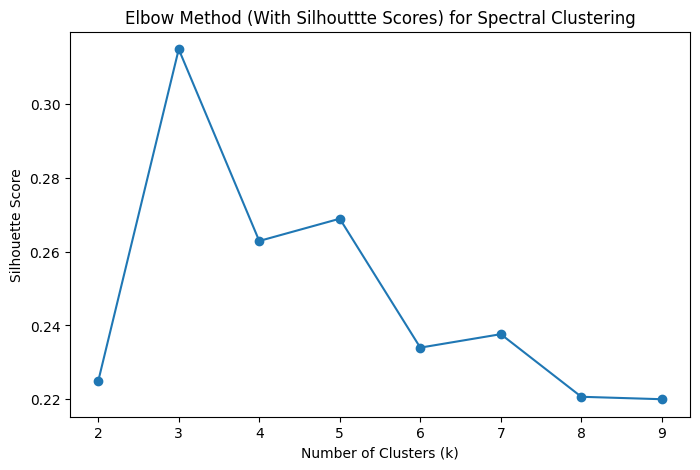

In [ ]:
scores = []
K = range(2, 10)

for k in K:
    sc_temp = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', assign_labels='kmeans')
    labels_temp = sc_temp.fit_predict(scaled_features)
    scores.append(silhouette_score(scaled_features, labels_temp))

plt.figure(figsize=(8, 5))
plt.plot(K, scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Elbow Method (With Silhouttte Scores) for Spectral Clustering")
plt.show()



In [ ]:
print(max(scores))

0.3147918431235075


In [ ]:
for k in range(len(scores)):
    if scores[k] == max(scores):
        print(k + 2)


3


In [ ]:
sc_temp = SpectralClustering(n_clusters=8, affinity='nearest_neighbors', assign_labels='kmeans')
labels_temp = sc_temp.fit_predict(scaled_features)

c:\Users\billj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


c:\Users\billj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\billj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


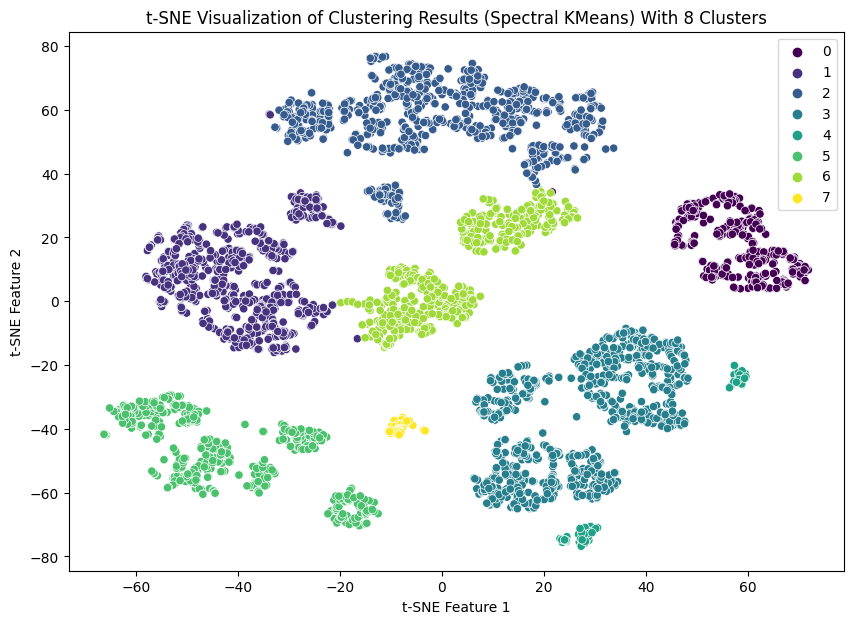

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

tsne_results = tsne.fit_transform(scaled_features)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    hue=labels_temp,
    palette="viridis",
    legend="full"
)
plt.title("t-SNE Visualization of Clustering Results (Spectral KMeans) With 8 Clusters")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.show()

In [ ]:
df

brand                            model   milage  fuel_type  \
0        14  Utility Police Interceptor Base  51000.0          1   
1        20                 Q50 Hybrid Sport  88900.0          4   
2        27                   RC 350 F Sport  23436.0          3   
3        52          Model X Long Range Plus  34000.0          2   
4        28              Aviator Reserve AWD  18196.0          3   
...     ...                              ...      ...        ...   
3938     35                      570S Spider   5918.0          3   
3939     43                   718 Cayman GT4   2100.0          3   
3940     25    Gallardo LP570-4 Superleggera  16000.0          3   
3941     12               500X Trekking Plus  48500.0          3   
3942     14                    Focus ST Base  20800.0          3   

                                                 engine  transmission  \
0     300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...             0   
1     354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...             0   
2         311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel             0   
3           534.0HP Electric Motor Electric Fuel System             0   
4         400.0HP 3.0L V6 Cylinder Engine Gasoline Fuel             0   
...                                                 ...           ...   
3938                   3.8L V8 32V MPFI DOHC Twin Turbo             3   
3939  414.0HP 4.0L Flat 6 Cylinder Engine Gasoline Fuel             2   
3940      562.0HP 5.2L 10 Cylinder Engine Gasoline Fuel             0   
3941       180.0HP 2.4L 4 Cylinder Engine Gasoline Fuel             0   
3942       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             2   

      ext_col  int_col  accident  clean_title     price  age  \
0           0        0         0            1   10300.0   11   
1           0        0         1            1   15500.0    9   
2           0        0         1            1   41927.0    3   
3           0        0         1            1   69950.0    4   
4           0        2         1            1   62000.0    2   
...       ...      ...       ...          ...       ...  ...   
3938       10        0         1            0  179900.0    6   
3939       10        0         1            0  136900.0    3   
3940       10        0         1            1  229000.0   13   
3941       10        2         1            1   15999.0    8   
3942       10        3         1            1   19795.0   11   

      Engine_Displacement  
0                3.700000  
1                3.800000  
2                3.500000  
3                3.500000  
4                2.000000  
...                   ...  
3938             6.000000  
3939             3.000000  
3940             3.683781  
3941             3.500000  
3942             2.000000  

[3943 rows x 13 columns]

In [ ]:
cluster_data = df.copy()

In [ ]:
cluster_data['Cluster'] = labels_temp


In [ ]:
cluster_summary = cluster_data.groupby('Cluster').agg({
    'price': ['mean', 'median', 'std'],
    'milage': ['mean', 'median'],
    'age': ['mean', 'median'],
    'Engine_Displacement': ['mean', 'median']
})
cluster_summary.columns = [' '.join(col).strip() for col in cluster_summary.columns]
print(cluster_summary)


           price mean  price median      price std    milage mean  \
Cluster                                                             
0        53760.875723       29970.0  143506.415117   56605.705202   
1        43762.548148       32000.0   55804.872659   62869.946667   
2        44972.485747       35750.0   42760.693433   60110.083238   
3        28759.813817       19983.5  102283.091344   91796.668618   
4        27632.300000       22000.0   17453.222902  118486.550000   
5        62303.692593       43632.5   59704.992975   32146.003704   
6        46113.954717       33145.0   49601.794028   61765.815094   
7        34641.731707       33242.0   13400.916590   47915.268293   

         milage median   age mean  age median  Engine_Displacement mean  \
Cluster                                                                   
0              47194.5  11.026012        10.0                  3.620192   
1              53677.0   8.200000         7.0                  3.705822   
2        

           Mean Price  25th Percentile  75th Percentile
Cluster                                                
0        53760.875723         18088.25          48000.0
1        43762.548148         18450.00          48500.0
2        44972.485747         19999.00          55000.0
3        28759.813817         11500.00          32000.0
4        27632.300000         15050.00          36875.0
5        62303.692593         31741.25          66249.5
6        46113.954717         17000.00          55000.0
7        34641.731707         24998.00          39998.0


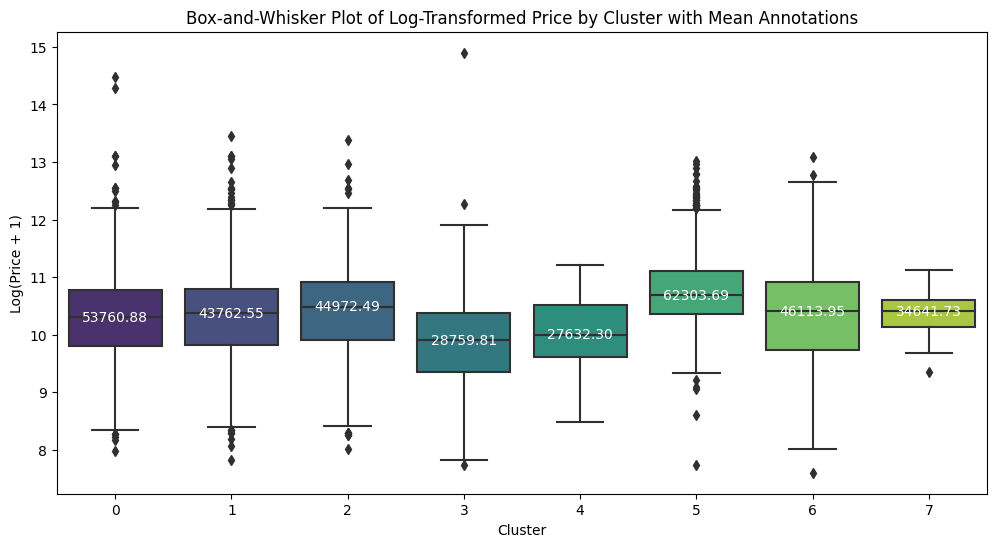

In [ ]:
# Calculate summary statistics for each cluster
cluster_summary = cluster_data.groupby('Cluster')['price'].agg(['mean', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)])
cluster_summary.columns = ['Mean Price', '25th Percentile', '75th Percentile']
print(cluster_summary)

# Add a log-transformed price column
cluster_data['Log_Price'] = np.log1p(cluster_data['price'])  # Apply log transformation (log(1+x))

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Log_Price', data=cluster_data, palette='viridis')

# Annotate average prices (non-log-transformed) in the middle of the box
for cluster in cluster_summary.index:
    mean_price = cluster_summary.loc[cluster, 'Mean Price']
    median_log_price = cluster_data[cluster_data['Cluster'] == cluster]['Log_Price'].median()  # Median of the log-transformed price
    plt.text(cluster, median_log_price,  # Place annotation at the median of the log-transformed price
             f"{mean_price:.2f}", ha='center', va='center', fontsize=10, color='white')


# Customize plot
plt.title("Box-and-Whisker Plot of Log-Transformed Price by Cluster with Mean Annotations")
plt.xlabel("Cluster")
plt.ylabel("Log(Price + 1)")
plt.show()



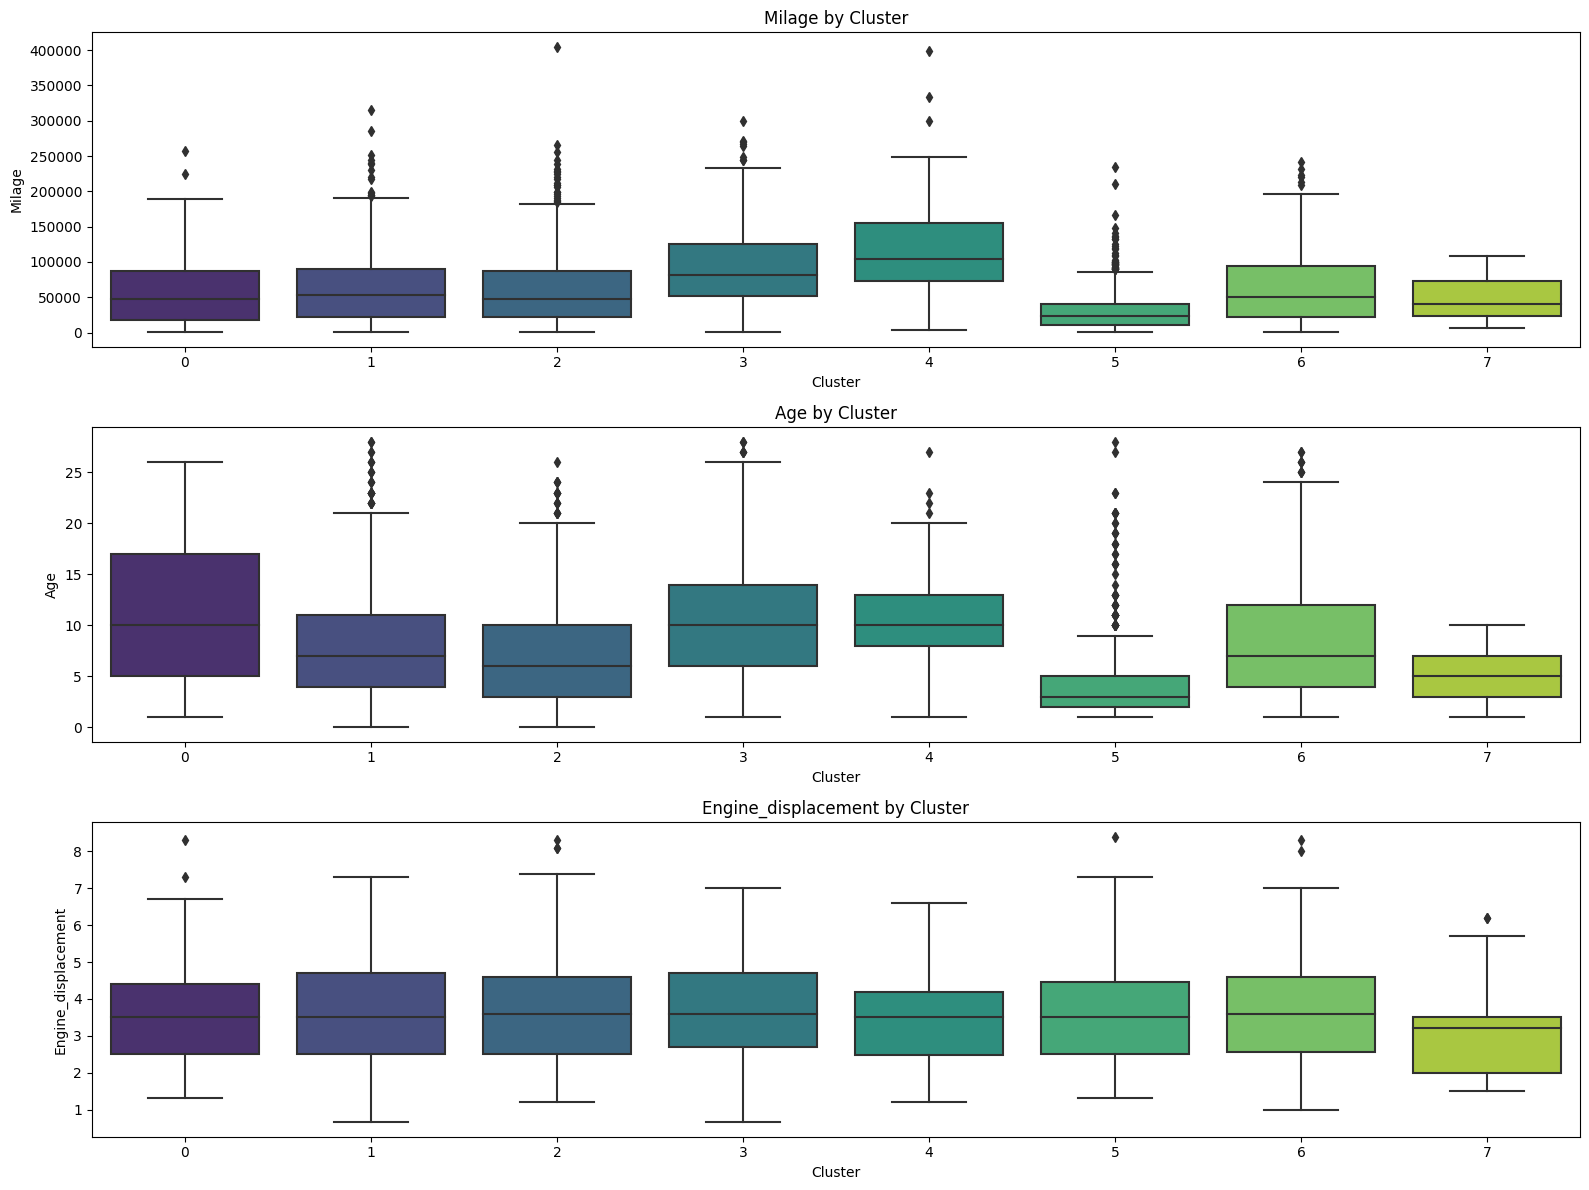

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['milage', 'age', 'Engine_Displacement']

# Create a 2x2 grid layout
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each variable in its respective subplot
for i, variable in enumerate(variables):
    sns.boxplot(x='Cluster', y=variable, data=cluster_data, palette='viridis', ax=axes[i])
    axes[i].set_title(f'{variable.capitalize()} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(variable.capitalize())

# Adjust layout
plt.tight_layout()
plt.show()



In [ ]:
df

brand                            model   milage  fuel_type  \
0        14  Utility Police Interceptor Base  51000.0          1   
1        20                 Q50 Hybrid Sport  88900.0          4   
2        27                   RC 350 F Sport  23436.0          3   
3        52          Model X Long Range Plus  34000.0          2   
4        28              Aviator Reserve AWD  18196.0          3   
...     ...                              ...      ...        ...   
3938     35                      570S Spider   5918.0          3   
3939     43                   718 Cayman GT4   2100.0          3   
3940     25    Gallardo LP570-4 Superleggera  16000.0          3   
3941     12               500X Trekking Plus  48500.0          3   
3942     14                    Focus ST Base  20800.0          3   

                                                 engine  transmission  \
0     300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...             0   
1     354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...             0   
2         311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel             0   
3           534.0HP Electric Motor Electric Fuel System             0   
4         400.0HP 3.0L V6 Cylinder Engine Gasoline Fuel             0   
...                                                 ...           ...   
3938                   3.8L V8 32V MPFI DOHC Twin Turbo             3   
3939  414.0HP 4.0L Flat 6 Cylinder Engine Gasoline Fuel             2   
3940      562.0HP 5.2L 10 Cylinder Engine Gasoline Fuel             0   
3941       180.0HP 2.4L 4 Cylinder Engine Gasoline Fuel             0   
3942       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             2   

      ext_col  int_col  accident  clean_title     price  age  \
0           0        0         0            1   10300.0   11   
1           0        0         1            1   15500.0    9   
2           0        0         1            1   41927.0    3   
3           0        0         1            1   69950.0    4   
4           0        2         1            1   62000.0    2   
...       ...      ...       ...          ...       ...  ...   
3938       10        0         1            0  179900.0    6   
3939       10        0         1            0  136900.0    3   
3940       10        0         1            1  229000.0   13   
3941       10        2         1            1   15999.0    8   
3942       10        3         1            1   19795.0   11   

      Engine_Displacement  
0                3.700000  
1                3.800000  
2                3.500000  
3                3.500000  
4                2.000000  
...                   ...  
3938             6.000000  
3939             3.000000  
3940             3.683781  
3941             3.500000  
3942             2.000000  

[3943 rows x 13 columns]

In [ ]:
colormap = plt.cm.get_cmap("tab20", len(df['brand'].unique()))  # 'tab20' is great for many distinct colors
colors = [colormap(i) for i in range(len(df['brand'].unique()))]

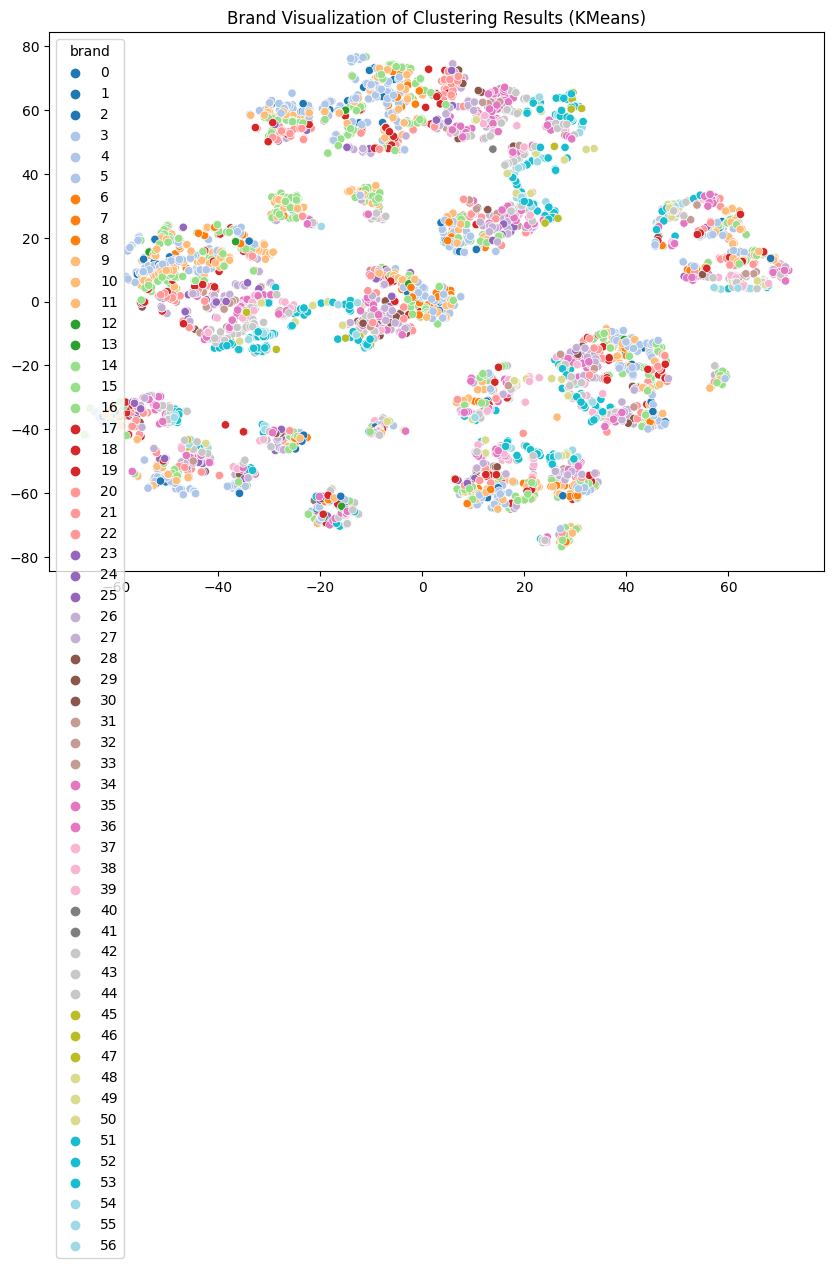

In [ ]:

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    hue=df['brand'],
    palette=colors,
)
plt.title("Brand Visualization of Clustering Results (KMeans)")
plt.show()

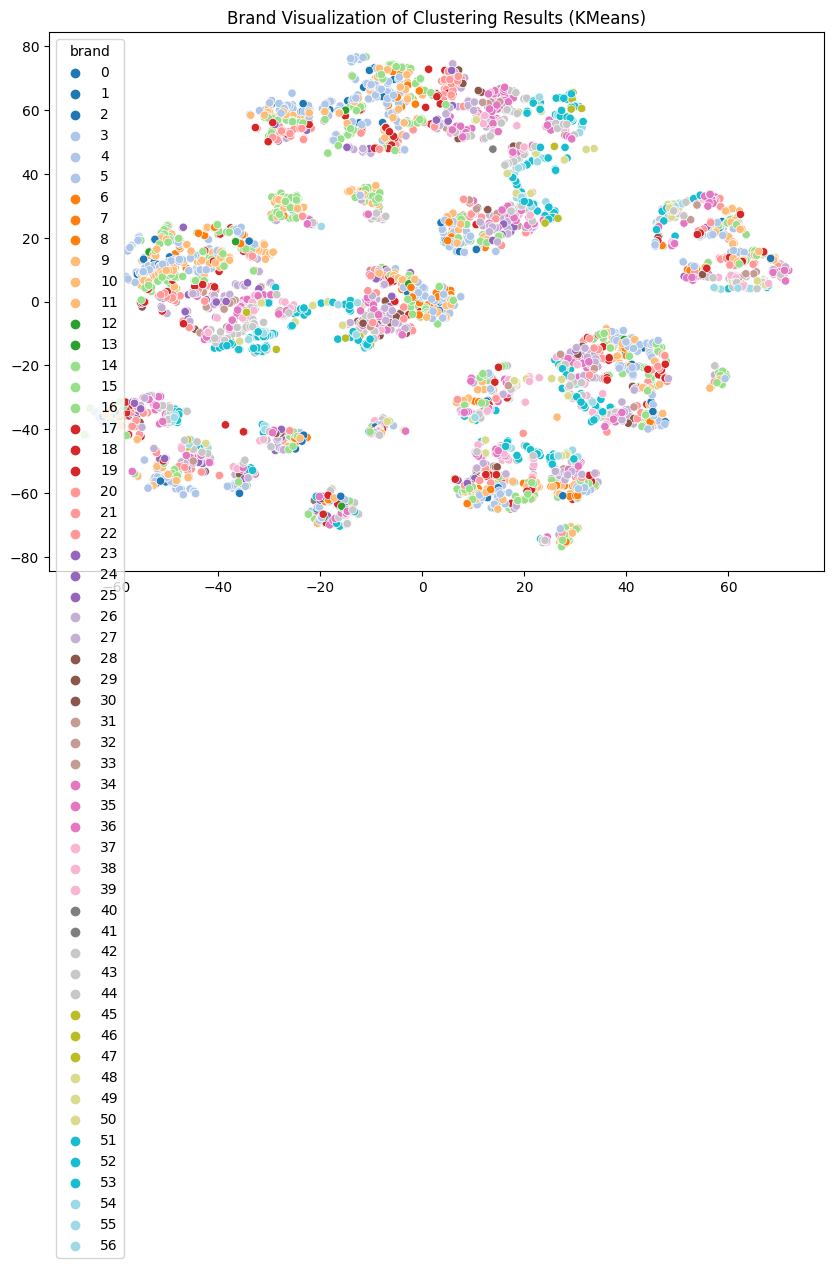

In [ ]:

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    hue=df['brand'],
    palette=colors,
)
plt.title("Brand Visualization of Clustering Results (KMeans)")
plt.show()

<AxesSubplot: >

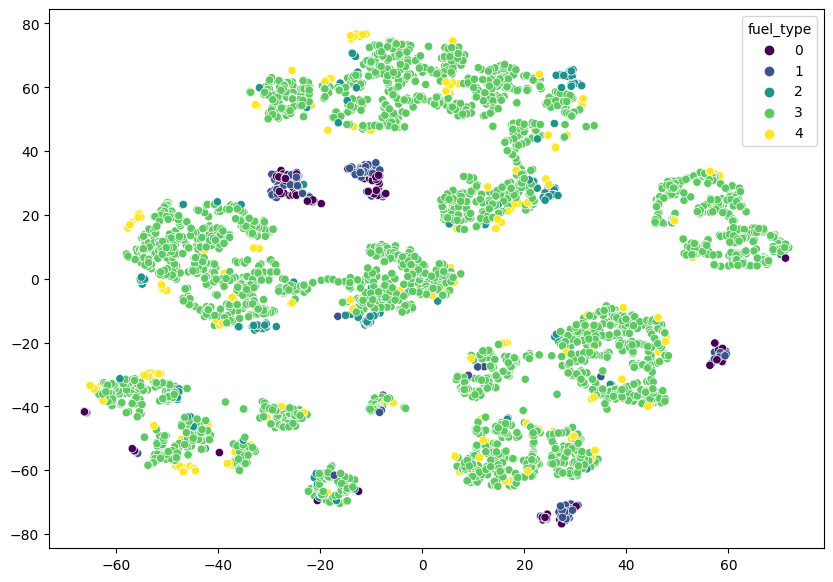

In [ ]:

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    hue=df['fuel_type'],
    palette="viridis",
    legend="full"
)

<AxesSubplot: >

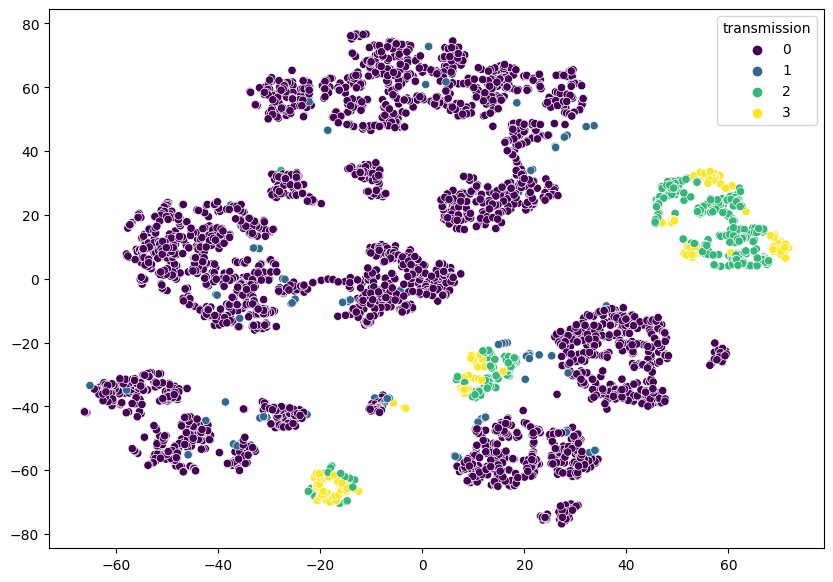

In [ ]:

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    hue=df['transmission'],
    palette="viridis",
    legend="full"
)

In [ ]:
def cluster_with_spectral(k = 2):
    sc = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', assign_labels='kmeans')
    labels = sc.fit_predict(scaled_features)
    clusters = df.copy()
    clusters['Cluster'] = labels
    grouped = clusters.groupby("Cluster")
    for cluster_id, group in grouped:
        print(f"\nCluster {cluster_id}:")
        print(group)

        # average price
        print(f"Average Price: {np.mean(group['price'])}")


Trying with 300 clusters:

In [ ]:
cluster_with_spectral(300)

c:\Users\billj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(



Cluster 0:
      brand            model   milage  fuel_type                       engine  \
2134     39          Rogue S  21212.0          3   1.5L I3 12V GDI DOHC Turbo   
2175     27  RX 450h F Sport  43671.0          4  3.5L V6 24V PDI DOHC Hybrid   
2198     39        Murano SV  23677.0          3        3.5L V6 24V MPFI DOHC   
2212     39    Altima 2.5 SV  22295.0          3         2.5L I4 16V GDI DOHC   
2872     39        Maxima SV  36466.0          3         3.5L V6 24V GDI DOHC   

      transmission  ext_col  int_col  accident  clean_title    price  age  \
2134             1        6        6         1            0  28906.0    2   
2175             1        6        7         1            0  44950.0    5   
2198             1        6        6         1            0  29510.0    3   
2212             1        6        3         1            0  23599.0    4   
2872             1        8        6         1            0  24980.0    2   

      Engine_Displacement  Cluster  
2

Trying with 500 clusters

In [ ]:
cluster_with_spectral(500)

c:\Users\billj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(



Cluster 0:
      brand                                       model   milage  fuel_type  \
570      26      Rover Range Rover 5.0L V8 Supercharged  17500.0          3   
578      27                            LX 570 Three-Row  39300.0          3   
663      26  Rover Range Rover 3.0L V6 Supercharged HSE  49208.0          3   
684      27                                 LC 500 Base  29800.0          3   
836      26  Rover Range Rover 3.0L V6 Supercharged HSE  59271.0          3   
854      20                      Q50 3.0t Red Sport 400  51850.0          3   
914      22                    Wrangler Unlimited Sport  58500.0          3   
1001     22                  Wrangler Unlimited Rubicon  49990.0          3   
1313     28                                 MKZ Reserve  71964.0          3   

                                             engine  transmission  ext_col  \
570    518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel             0        0   
578    383.0HP 5.7L 8 Cylinder Engine Gas

## Regression Approaches
1) KNN Regression
2) SVM

In [ ]:
regression_df = df[['brand', 'milage', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price', 'age', 'Engine_Displacement']]
regression_df.head()

brand   milage  fuel_type  transmission  ext_col  int_col  accident  \
0     14  51000.0          1             0        0        0         0   
1     20  88900.0          4             0        0        0         1   
2     27  23436.0          3             0        0        0         1   
3     52  34000.0          2             0        0        0         1   
4     28  18196.0          3             0        0        2         1   

   clean_title    price  age  Engine_Displacement  
0            1  10300.0   11                  3.7  
1            1  15500.0    9                  3.8  
2            1  41927.0    3                  3.5  
3            1  69950.0    4                  3.5  
4            1  62000.0    2                  2.0

In [ ]:
X, y = regression_df[['brand', 'milage', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'age', 'Engine_Displacement']], regression_df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Test

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 3311469651.34
R^2 Score: -0.84


Try plotting different neighbor counts

Text(0, 0.5, 'MSE')

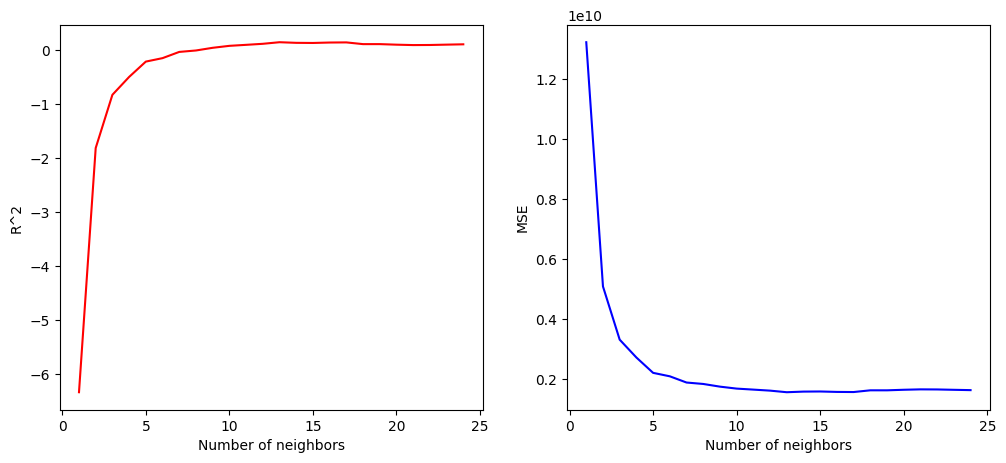

In [ ]:
neighbors = range(1, 25, 1)

r2scores = []
msescores = []

for n in neighbors:

    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    msescores.append(mse)
    r2scores.append(r2)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))


ax[0].plot(neighbors, r2scores, color = 'red')
ax[0].set_xlabel("Number of neighbors")
ax[0].set_ylabel("R^2")

ax[1].plot(neighbors, msescores, color = 'blue')
ax[1].set_xlabel("Number of neighbors")
ax[1].set_ylabel("MSE")



Using CV and Grid Search to find the best paramaters

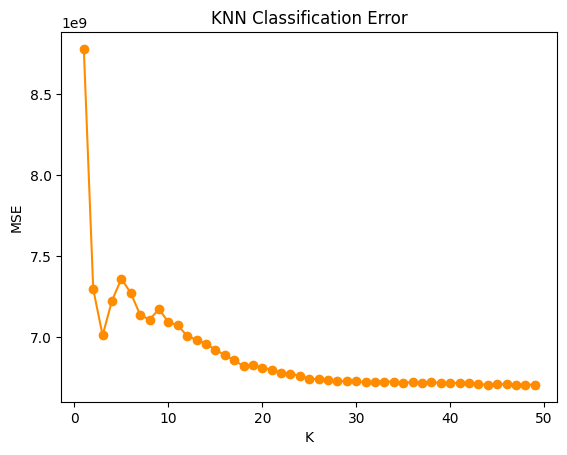

In [ ]:
knn = KNeighborsRegressor()

param_grid = {'n_neighbors': range(1, 50)}

cv = 10

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

results = pd.DataFrame(grid_search.cv_results_)
k_values = results['param_n_neighbors']
errors = 1 - results['mean_test_score']

plt.plot(k_values, errors, marker='o', linestyle='-', color='darkorange')
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('KNN Classification Error')
plt.show()

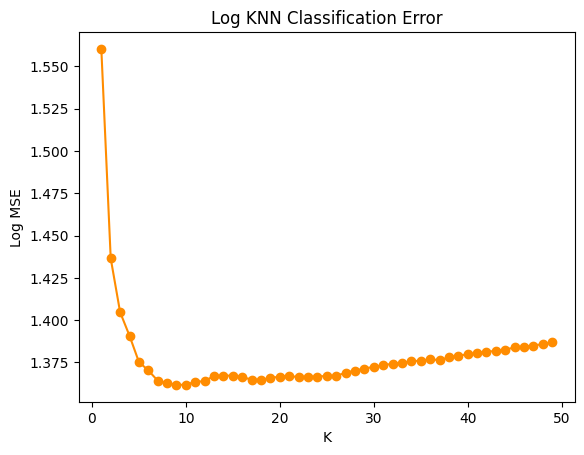

9


In [ ]:
knn = KNeighborsRegressor()

param_grid = {'n_neighbors': range(1, 50)}

cv = 10

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, np.log1p(y_train))

results = pd.DataFrame(grid_search.cv_results_)
k_values = results['param_n_neighbors']
errors = 1 - results['mean_test_score']

plt.plot(k_values, errors, marker='o', linestyle='-', color='darkorange')
plt.xlabel('K')
plt.ylabel('Log MSE')
plt.title('Log KNN Classification Error')
plt.show()
best_k = k_values.iloc[errors.idxmin()]
print(best_k)

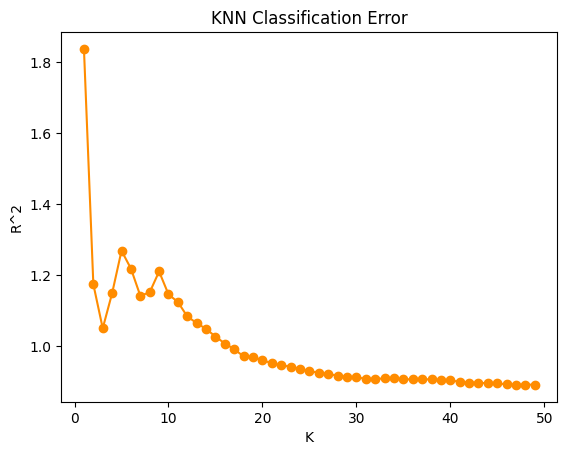

47


In [ ]:
knn = KNeighborsRegressor()

param_grid = {'n_neighbors': range(1, 50)}

cv = 10

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

results = pd.DataFrame(grid_search.cv_results_)
k_values = results['param_n_neighbors']
errors = 1 - results['mean_test_score']

plt.plot(k_values, errors, marker='o', linestyle='-', color='darkorange')
plt.xlabel('K')
plt.ylabel('R^2')
plt.title('KNN Classification Error')
plt.show()
best_k = k_values.iloc[errors.idxmin()]
print(best_k)

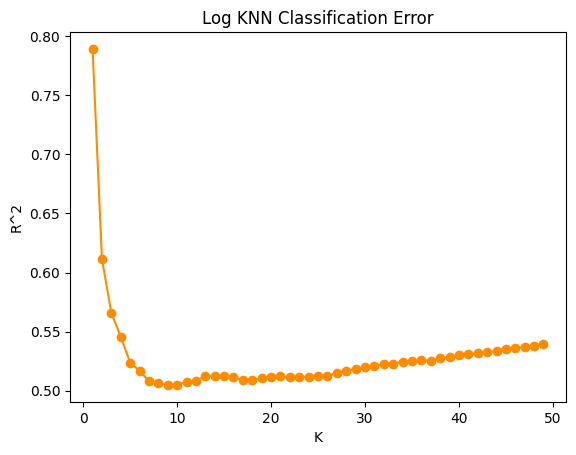

9


In [ ]:
knn = KNeighborsRegressor()

param_grid = {'n_neighbors': range(1, 50)}

cv = 10

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='r2')
grid_search.fit(X_train_scaled, np.log1p(y_train))

results = pd.DataFrame(grid_search.cv_results_)
k_values = results['param_n_neighbors']
errors = 1 - results['mean_test_score']

plt.plot(k_values, errors, marker='o', linestyle='-', color='darkorange')
plt.xlabel('K')
plt.ylabel('R^2')
plt.title('Log KNN Classification Error')
plt.show()
best_k = k_values.iloc[errors.idxmin()]
print(best_k)

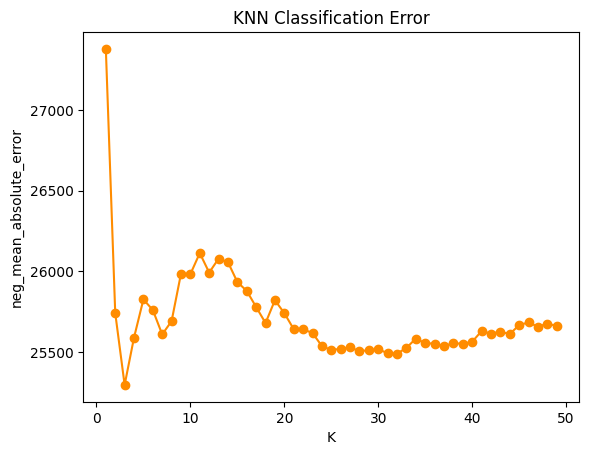

3


In [ ]:
knn = KNeighborsRegressor()

param_grid = {'n_neighbors': range(1, 50)}

cv = 10

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

results = pd.DataFrame(grid_search.cv_results_)
k_values = results['param_n_neighbors']
errors = 1 - results['mean_test_score']

plt.plot(k_values, errors, marker='o', linestyle='-', color='darkorange')
plt.xlabel('K')
plt.ylabel('neg_mean_absolute_error')
plt.title('KNN Classification Error')
plt.show()
best_k = k_values.iloc[errors.idxmin()]
print(best_k)

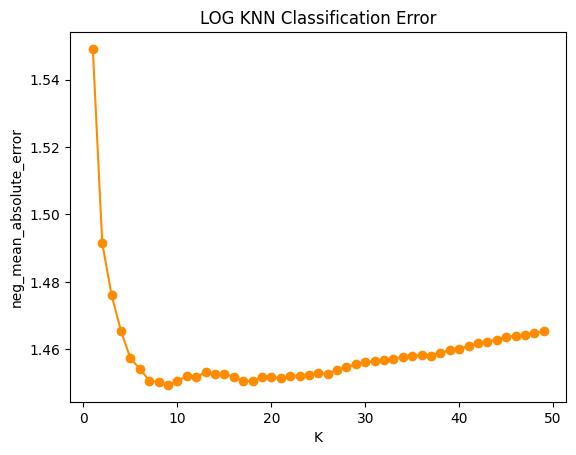

9


In [ ]:
knn = KNeighborsRegressor()

param_grid = {'n_neighbors': range(1, 50)}

cv = 10

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, np.log1p(y_train))

results = pd.DataFrame(grid_search.cv_results_)
k_values = results['param_n_neighbors']
errors = 1 - results['mean_test_score']

plt.plot(k_values, errors, marker='o', linestyle='-', color='darkorange')
plt.xlabel('K')
plt.ylabel('neg_mean_absolute_error')
plt.title('LOG KNN Classification Error')
plt.show()
best_k = k_values.iloc[errors.idxmin()]
print(best_k)

Using k = 3 (lowest value in the absolute error CV training) to train a model

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 3311469651.34
Root Mean Squared Error: 57545.37
R^2 Score: -0.84


Using log because price might range too much

In [ ]:
knn = KNeighborsRegressor(n_neighbors=9)
y_temp = np.log1p(y_train)
knn.fit(X_train_scaled, y_temp)


y_pred = np.expm1(knn.predict(X_test_scaled))
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 1363734177.10
Root Mean Squared Error: 36928.77
R^2 Score: 0.24


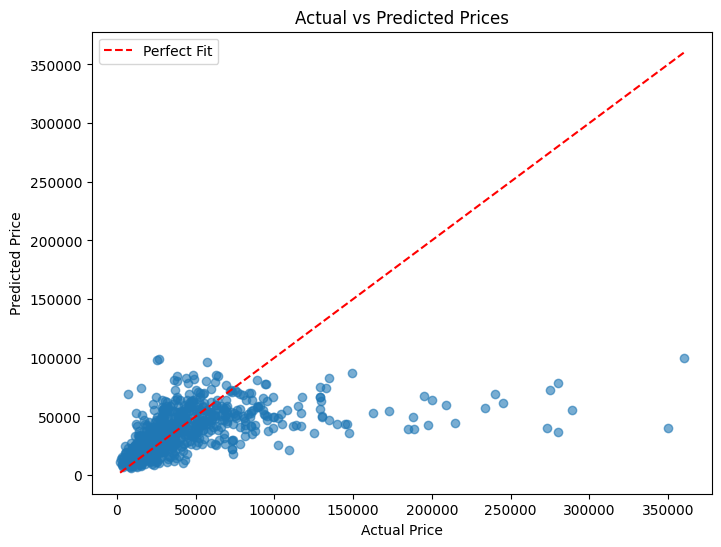

In [ ]:
# Assuming y_test and y_pred are your actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()


In [ ]:
from sklearn.inspection import permutation_importance

# Assuming you have trained your KNN model (knn)
perm_importance = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)
print(importance_df)


c:\Users\billj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\billj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\billj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\billj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\billj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warni

               Feature    Importance
6             accident  5.072334e-08
0                brand  2.927655e-09
3         transmission  2.413632e-09
5              int_col  0.000000e+00
7          clean_title  0.000000e+00
2            fuel_type -5.002363e-09
9  Engine_Displacement -9.620449e-09
4              ext_col -1.033506e-08
8                  age -2.241513e-07
1               milage -6.620956e-07


c:\Users\billj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\billj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


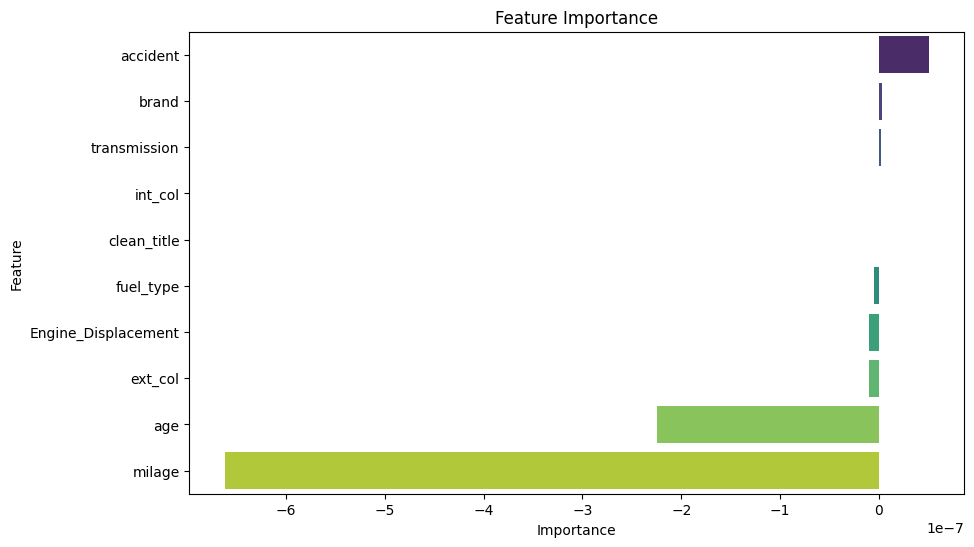

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

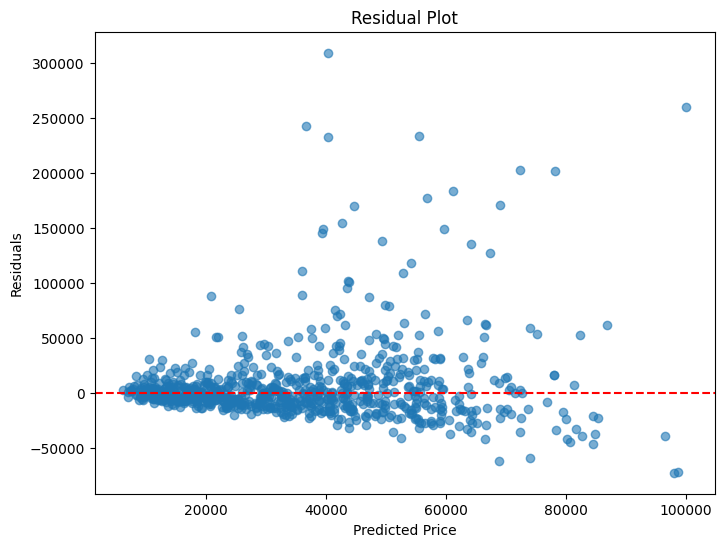

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



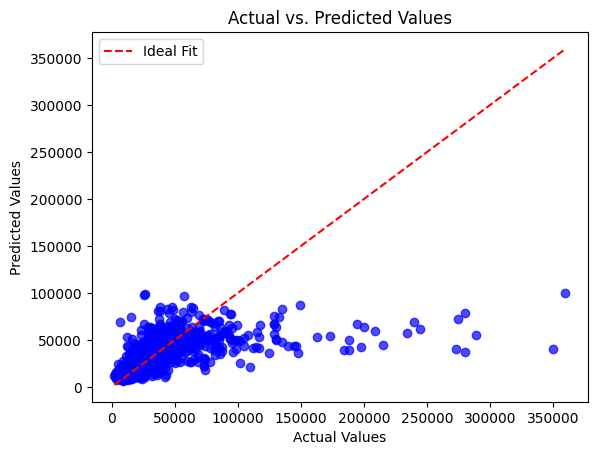

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [ ]:
X_test

brand    milage  fuel_type  transmission  ext_col  int_col  accident  \
3711     52   19800.0          2             0        9        9         1   
2910     53  267000.0          3             2        8        6         0   
1871     44   63875.0          4             0        3        0         0   
729      44   98650.0          0             0        0        0         1   
605       8   46000.0          3             0        0        6         0   
...     ...       ...        ...           ...      ...      ...       ...   
3279      9   13465.0          3             0        9        0         1   
1844      3   89500.0          3             0        3        0         1   
3762     14   26840.0          3             2        9        0         1   
1403      3  111773.0          3             0        2        6         1   
1338     53  161000.0          4             1        1        3         1   

      clean_title  age  Engine_Displacement  
3711            1    4                  2.7  
2910            1   25                  3.0  
1871            1    4                  3.4  
729             1    6                  3.7  
605             1    5                  4.0  
...           ...  ...                  ...  
3279            1    7                  6.2  
1844            1   10                  5.2  
3762            1    6                  3.8  
1403            1   11                  3.0  
1338            1    9                  3.5  

[789 rows x 10 columns]

In [ ]:
X_test_scaled[4]

array([0.14285714, 0.11336132, 0.75      , 0.        , 0.        ,
       0.6       , 0.        , 1.        , 0.17857143, 0.4379085 ])

In [ ]:
y_test[605]

29000.0

In [ ]:
knn.predict([X_test_scaled[4]])

array([10.7571395])

# Support Vector Machine

In [ ]:
X, y = regression_df[['brand', 'milage', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'age', 'Engine_Displacement']], regression_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Test
svm_model = SVR(kernel = 'rbf', C=1e3, gamma=0.1)
svm_model.fit(X_train, y_train)

mse = mean_squared_error(y_test, y_pred)
mse


1296800585.5662565

In [ ]:
y_test

3711    44990.0
2910     8000.0
1871    41900.0
729     56750.0
605     29000.0
         ...   
3279    44900.0
1844    18000.0
3762    42500.0
1403    17000.0
1338    11500.0
Name: price, Length: 789, dtype: float64

In [ ]:
y_pred

array([ 59053.82457415,   9294.23314042,  37903.20410052,  54608.27188932,
        46963.13472755,  23661.15316684,  16836.87021924,  47044.60414646,
        42758.82069272,  17948.85793429,  14225.64565382,  50147.66037723,
        41169.69412824,  55083.25220448,   9614.44724405,  40394.54059673,
        11274.99097106,  35227.50394226,  13080.50839874,  59698.24720515,
        61641.81776976,  56449.29652293,  21796.71800203,  17956.18460943,
        38958.87136844,  13806.8219414 ,  14539.22094306,   8323.79384178,
        22949.89326856,  75156.45430996,  41567.71725027,  40637.26270665,
        45666.65706328,  23357.27857405,  11651.27715685,   7265.13099611,
        19851.09356457,  32986.18694923,   9951.48019859,  16805.24805849,
        44240.2754118 ,  52371.09744424,  29427.30152847,  36666.73151714,
        70139.43097732,  48184.92271651,  55803.19264683,  96582.59967251,
        36547.15983719,  46631.73270728,  16702.13474928,  15115.40141204,
        61127.06886966,  

Fitting 10 folds for each of 30 candidates, totalling 300 fits


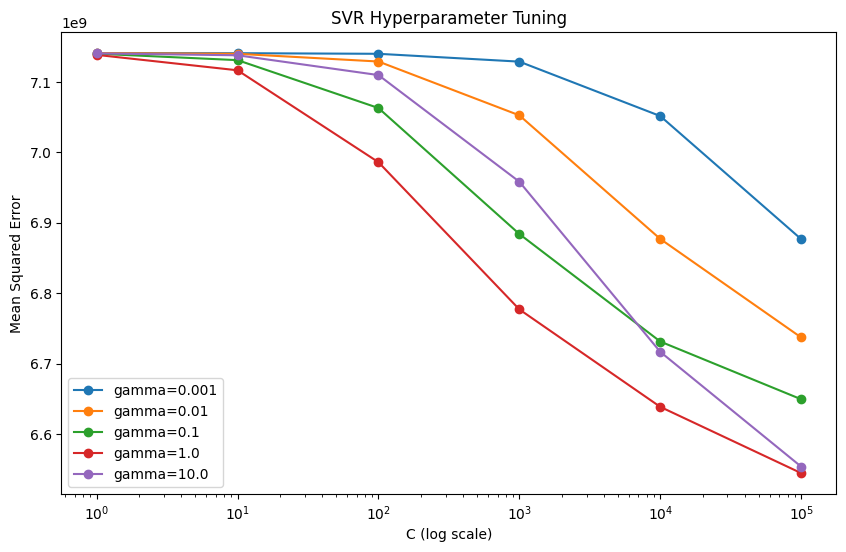

Best parameters: {'C': 100000, 'gamma': 1, 'kernel': 'rbf'}
Best MSE: 6544630627.179257
RMSE on test set: 36011.11752731726


In [ ]:
param_grid = {
    'C': [1, 10, 100, 1000, 10000, 100000],
    'gamma': [10, 1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
results = grid_search.cv_results_
mean_test_scores = -results['mean_test_score']
params = results['params']


c_values = [param['C'] for param in params]
gamma_values = [param['gamma'] for param in params]
plt.figure(figsize=(10, 6))
for gamma in np.unique(gamma_values):
    subset = [(c, mse) for c, g, mse in zip(c_values, gamma_values, mean_test_scores) if g == gamma]
    subset = sorted(subset, key=lambda x: x[0])
    c_plot, mse_plot = zip(*subset)
    plt.plot(c_plot, mse_plot, marker='o', label=f'gamma={gamma}')

plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('SVR Hyperparameter Tuning')
plt.legend()
plt.show()

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
best_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Best parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)
print("RMSE on test set:", best_rmse)


In [ ]:
best_model

SVR(C=100000, gamma=1)

In [ ]:
y_pred_svr = best_model.predict(X_test_scaled)
y_pred_svr


array([46728.9736131 ,  8114.20323765, 36978.55118926, 53781.8981886 ,
       40346.60536268, 20743.20950412, 13881.24445461, 52362.07948447,
       42195.48402739, 24986.8089091 , 11093.31946855, 65204.83289587,
       28570.14198309, 48289.65436097,  6237.4059618 , 55701.84853785,
        8721.72954121, 29008.265741  ,  5983.12422266, 52504.17566867,
       51722.57813558, 54135.84679842, 15625.2782423 , 26982.23964973,
       42574.70077826, 21135.00171464, 19230.59009956,  6334.25868757,
       30858.99297538, 64372.2696237 , 39861.21715397, 36452.18296645,
       61592.75733576, 33020.59828415, 14516.17669696,  9934.73552985,
       15015.50230962, 22865.52915332,  8450.98795847, 12868.36558309,
       47056.37982297, 52819.12387651, 39781.16985104, 41821.73906333,
       60938.43924836, 47247.97171589, 58219.70779599, 60808.35258754,
       48489.37359398, 40288.62758361, 12933.08555392, 15593.10824944,
       55653.14229851,  8633.40913155, 64651.33549846, 31651.772175  ,
      

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


R² Score: 0.28


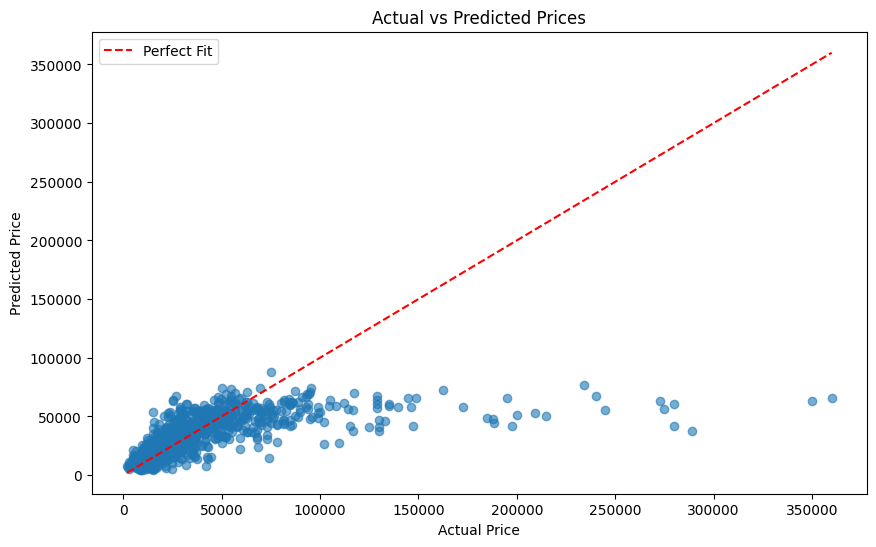

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[0.26785714, 0.35539639, 0.75      , ..., 1.        , 0.28571429,
        0.4379085 ],
       [0.05357143, 0.49864164, 0.75      , ..., 1.        , 0.57142857,
        0.17647059],
       [0.25      , 0.16646085, 0.75      , ..., 1.        , 0.17857143,
        0.60784314],
       ...,
       [0.375     , 0.09305261, 0.75      , ..., 1.        , 0.21428571,
        0.30718954],
       [0.94642857, 0.00321067, 0.75      , ..., 1.        , 0.03571429,
        0.60784314],
       [0.48214286, 0.30476661, 0.75      , ..., 1.        , 0.57142857,
        0.17647059]])

In [ ]:
y_train[1:10]

1113      5700.0
1513     40500.0
2792      9000.0
2925     26500.0
3761     30900.0
2654    695000.0
862      15000.0
3759     26999.0
803       5200.0
Name: price, dtype: float64

In [ ]:
best_model.predict([X_train_scaled[7]])

array([9695.59562838])

In [ ]:
X_test

array([[0.92857143, 0.04865399, 0.5       , ..., 1.        , 0.14285714,
        0.26797386],
       [0.94642857, 0.6591751 , 0.75      , ..., 1.        , 0.89285714,
        0.30718954],
       [0.78571429, 0.15750803, 1.        , ..., 1.        , 0.14285714,
        0.35947712],
       ...,
       [0.25      , 0.066041  , 0.75      , ..., 1.        , 0.21428571,
        0.41176471],
       [0.05357143, 0.2758039 , 0.75      , ..., 1.        , 0.39285714,
        0.30718954],
       [0.94642857, 0.39738207, 1.        , ..., 1.        , 0.32142857,
        0.37254902]])

In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)
print(importance_df)


   Importance
1    0.199311
8    0.133175
6    0.020133
2    0.010879
3    0.009477
5    0.008124
0    0.005993
4    0.001015
7   -0.001588
9   -0.004006


In [ ]:
features = ['accident', 'brand', 'transmission', 'int_col', 'clean_title', 'fuel_type', 'Engine_Displacement', 'ext_col', 'age', 'milage']
importance_df['Feature'] = features

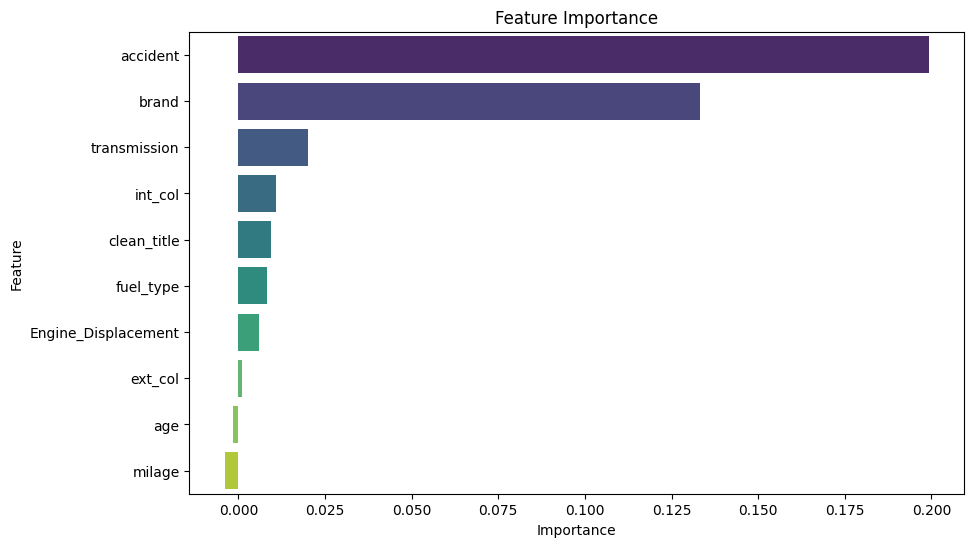

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()